# Ensemble Learning

### 1) Using sklearn majority voting, stacking, bagging, random forest, and adaboost classifiers

### 2) Using sklearn gradient boosting regressor 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

data = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
data["label"] = cancer["target"]
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
X = data.drop(columns=["label"])
y = data["label"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [4]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Simple Ensemble Learning: Majority Voting

In [5]:
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = SVC(kernel='poly', degree=2)
clf3 = GaussianNB()

VC = VotingClassifier(estimators=[('DT', clf1),
                                  ('SVM', clf2),
                                  ('GuassiaNB', clf3)], 
                      voting='hard')

for clf, name in zip([clf1, clf2, clf3, VC], ['DT', 'SVM', 'GaussianNB', 'Voting Classfier']):
    clf.fit(X_train_scaled, y_train)
    print(name,'Training accuracy:', clf.score(X_train_scaled, y_train))
    print(name, 'Test accuracy:', clf.score(X_test_scaled, y_test), '\n')

DT Training accuracy: 1.0
DT Test accuracy: 0.9300699300699301 

SVM Training accuracy: 0.8450704225352113
SVM Test accuracy: 0.8181818181818182 

GaussianNB Training accuracy: 0.9342723004694836
GaussianNB Test accuracy: 0.9440559440559441 

Voting Classfier Training accuracy: 0.960093896713615
Voting Classfier Test accuracy: 0.951048951048951 



# Stacking

In [6]:
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = SVC(kernel='poly', degree=2)
clf3 = GaussianNB()

SC = StackingClassifier(estimators=[('DT', clf1),
                                    ('SVM', clf2),
                                    ('GaussianNB', clf3)], 
                        final_estimator=LogisticRegression(max_iter=500),
                        cv=10,
                        passthrough=True)

for clf, name in zip([clf1, clf2, clf3, SC], ['DT', 'SVM', 'GaussianNB', 'Stacking Classfier']):
    clf.fit(X_train_scaled, y_train)
    print(name,'Training accuracy:', clf.score(X_train_scaled, y_train))
    print(name, 'Test accuracy:', clf.score(X_test_scaled, y_test), '\n')

DT Training accuracy: 1.0
DT Test accuracy: 0.9300699300699301 

SVM Training accuracy: 0.8450704225352113
SVM Test accuracy: 0.8181818181818182 

GaussianNB Training accuracy: 0.9342723004694836
GaussianNB Test accuracy: 0.9440559440559441 

Stacking Classfier Training accuracy: 0.9929577464788732
Stacking Classfier Test accuracy: 0.9790209790209791 



# A Single Decision Tree Classifier

In [7]:
# We create a stump, which is a decision tree consisiting of a root and two leaves

stump = DecisionTreeClassifier(max_depth=1)

stump.fit(X_train, y_train)

print('Decision Stump Training accuracy:', stump.score(X_train, y_train))
print('Decision Stump Testing accuracy:', stump.score(X_test, y_test))

Decision Stump Training accuracy: 0.9342723004694836
Decision Stump Testing accuracy: 0.8741258741258742


In [8]:
# We create a fully grown decision tree

DT = DecisionTreeClassifier(random_state=1)

DT.fit(X_train, y_train)

print('Decision Tree Training accuracy:', DT.score(X_train, y_train))
print('Decision Tree Testing accuracy:', DT.score(X_test, y_test))

Decision Tree Training accuracy: 1.0
Decision Tree Testing accuracy: 0.9300699300699301


# Bagging 

In [9]:
BG = BaggingClassifier(DecisionTreeClassifier(max_depth=None, random_state=1), 
                       max_samples= 0.5, 
                       n_estimators = 10,
                       random_state=0)

BG.fit(X_train,y_train)

print('Training accuracy:', BG.score(X_train, y_train))
print('Testing accuracy:', BG.score(X_test, y_test))

Training accuracy: 0.9835680751173709
Testing accuracy: 0.951048951048951


# Random Forest

In [10]:
RF = RandomForestClassifier(max_depth=None, n_estimators = 10,
                            random_state=1)

RF.fit(X_train, y_train)

print('Training accuracy:', RF.score(X_train, y_train))
print('Testing accuracy:', RF.score(X_test, y_test))

Training accuracy: 0.9976525821596244
Testing accuracy: 0.951048951048951


# AdaBoost 

In [11]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=1),
                              n_estimators=10,
                              learning_rate=0.9)

adaboost.fit(X_train, y_train)

print('Training accuracy:', adaboost.score(X_train, y_train))
print('Testing accuracy:', adaboost.score(X_test, y_test))

Training accuracy: 0.9859154929577465
Testing accuracy: 0.958041958041958


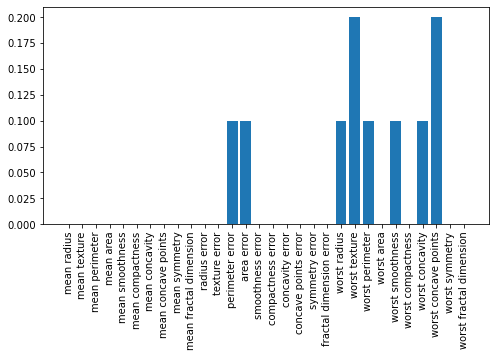

In [12]:
importance = adaboost.feature_importances_

plt.figure(figsize=(8,4))

position = range(len(importance))
plt.bar(position, importance)
plt.xticks(position, cancer['feature_names'], rotation=90);

# Gradient Boosting

The main idea is to build models sequentially by creating a new model on the errors or residuals of the previous model.

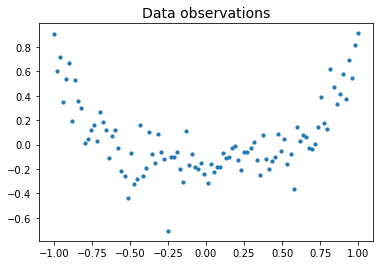

In [13]:
X = np.linspace(-1, 1, 100)
y = X**4 + np.random.normal(-0.15, 0.15, 100)

plt.scatter(X, y, s=10)
plt.title("Data observations", fontsize=14);

In [14]:
X

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [15]:
X_new = X.reshape(-1, 1)
X_new

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

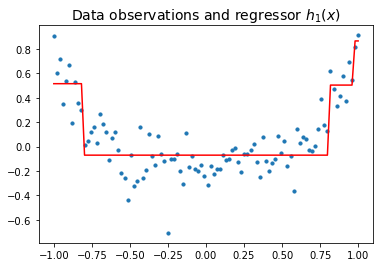

In [26]:
dtr1 = DecisionTreeRegressor(max_depth=2, random_state=42)
dtr1.fit(X_new, y)

plt.scatter(X, y, s=10)
plt.plot(X, dtr1.predict(X_new), color="red")
plt.title("Data observations and regressor $h_1(x)$", fontsize=14);

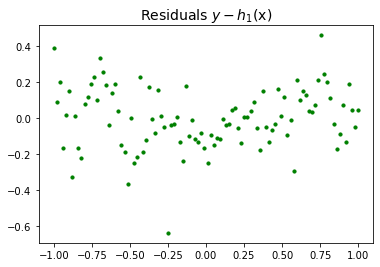

In [27]:
y2 = y - dtr1.predict(X_new)
plt.scatter(X, y2, color="green", s=10)
plt.title("Residuals $y-h_1$(x)", fontsize=14);

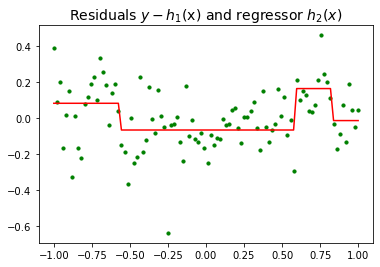

In [28]:
dtr2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dtr2.fit(X_new, y2)

plt.scatter(X, y2, color="green", s=10)
plt.plot(X, dtr2.predict(X_new), color="red")
plt.title("Residuals $y-h_1$(x) and regressor $h_2(x)$", fontsize=14);

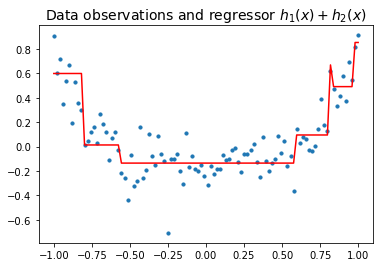

In [29]:
plt.scatter(X, y, s=10)
plt.plot(X, dtr1.predict(X_new)+dtr2.predict(X_new), color="red");
plt.title("Data observations and regressor $h_1(x)+h_2(x)$", fontsize=14);

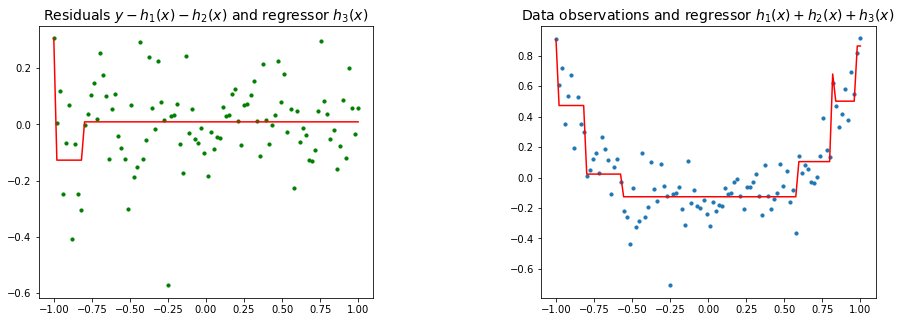

In [30]:
y3 = y2 - dtr2.predict(X_new)

dtr3 = DecisionTreeRegressor(max_depth=2, random_state=42)
dtr3.fit(X_new, y3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(X, y3, color="green", s=10)
ax1.plot(X, dtr3.predict(X_new), color="red")
ax1.set_title("Residuals $y-h_1(x)-h_2(x)$ and regressor $h_3(x)$", fontsize=14);

fig.subplots_adjust(wspace=0.5)

ax2.scatter(X, y, s=10)
ax2.plot(X, dtr1.predict(X_new)+dtr2.predict(X_new)+dtr3.predict(X_new), color="red");
ax2.set_title("Data observations and regressor $h_1(x) + h_2(x) + h_3(x)$", fontsize=14);

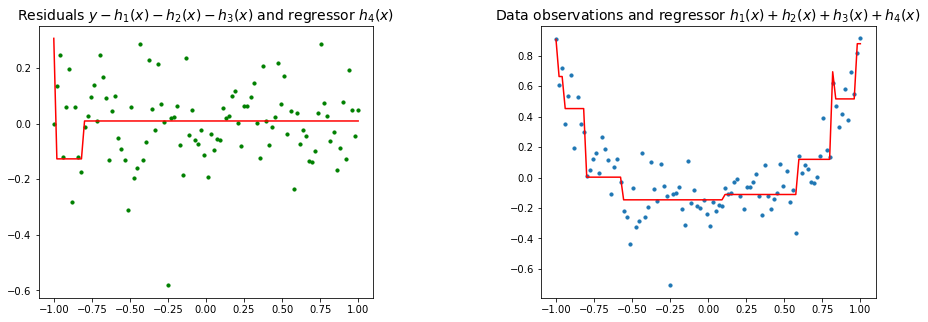

In [31]:
y4 = y3 - dtr3.predict(X_new)

dtr4 = DecisionTreeRegressor(max_depth=2, random_state=42)
dtr4.fit(X_new, y4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.scatter(X, y4, color="green", s=10)
ax1.plot(X, dtr3.predict(X_new), color="red")
ax1.set_title("Residuals $y-h_1(x)-h_2(x)-h_3(x)$ and regressor $h_4(x)$", fontsize=14);

fig.subplots_adjust(wspace=0.5)

ax2.scatter(X, y, s=10)
ax2.plot(X, dtr1.predict(X_new)+dtr2.predict(X_new)+dtr3.predict(X_new)+dtr4.predict(X_new), color="red");
ax2.set_title("Data observations and regressor $h_1(x) + h_2(x) + h_3(x) + h_4(x)$", fontsize=14);

In [32]:
GBR = GradientBoostingRegressor(max_depth=2, n_estimators=4, learning_rate=1)
GBR.fit(X_new, y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=4)

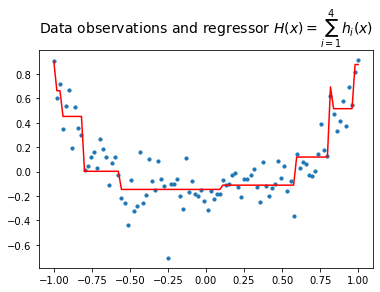

In [33]:
plt.scatter(X, y, s=10)

plt.plot(X, GBR.predict(X_new), color = "red")
plt.title("Data observations and regressor $H(x)=\sum_{i=1}^{4}h_i(x)$", fontsize=14);

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [35]:
boston = load_boston()

In [36]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [37]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
GBR = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

model = GBR.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [41]:
r2_score(y_pred, y_test)

0.32724120361188114

In [42]:
from sklearn.model_selection import GridSearchCV

GSGBR = GridSearchCV(estimator = GradientBoostingRegressor(),
                     param_grid = {'learning_rate': [0.05, 0.10, 0.15],
                                   'n_estimators': [100, 150, 200, 250]},
                     scoring = 'r2')

GSGBR.fit(X_train, y_train)

GSGBR.best_score_, GSGBR.best_params_

(0.8537859004901479, {'learning_rate': 0.1, 'n_estimators': 250})